# PT4 - Análise de Erros Estacionários

In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

## Modelagem

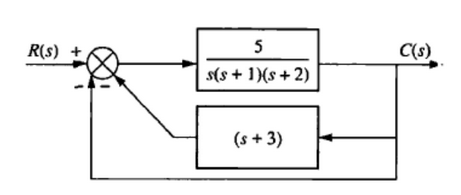

In [2]:
num = 5
den = [1, 3, 7, 15]

sis = ct.tf(num, den)
sis

TransferFunction(array([5]), array([ 1,  3,  7, 15]))

## Respostas degrau, rampa e aceleração

Modelagem do input

In [3]:
t = np.linspace(0, 20, 1000)

step_u = 50
ramp_u = 50*t
ac_u = 50*t**2

step_res = ct.forced_response(sis, T = t, U = step_u)
ramp_res = ct.forced_response(sis, T = t, X0 = 0, U = ramp_u)
ac_res = ct.forced_response(sis, T = t, U = ac_u)

Gráficos de c(t) e r(t)

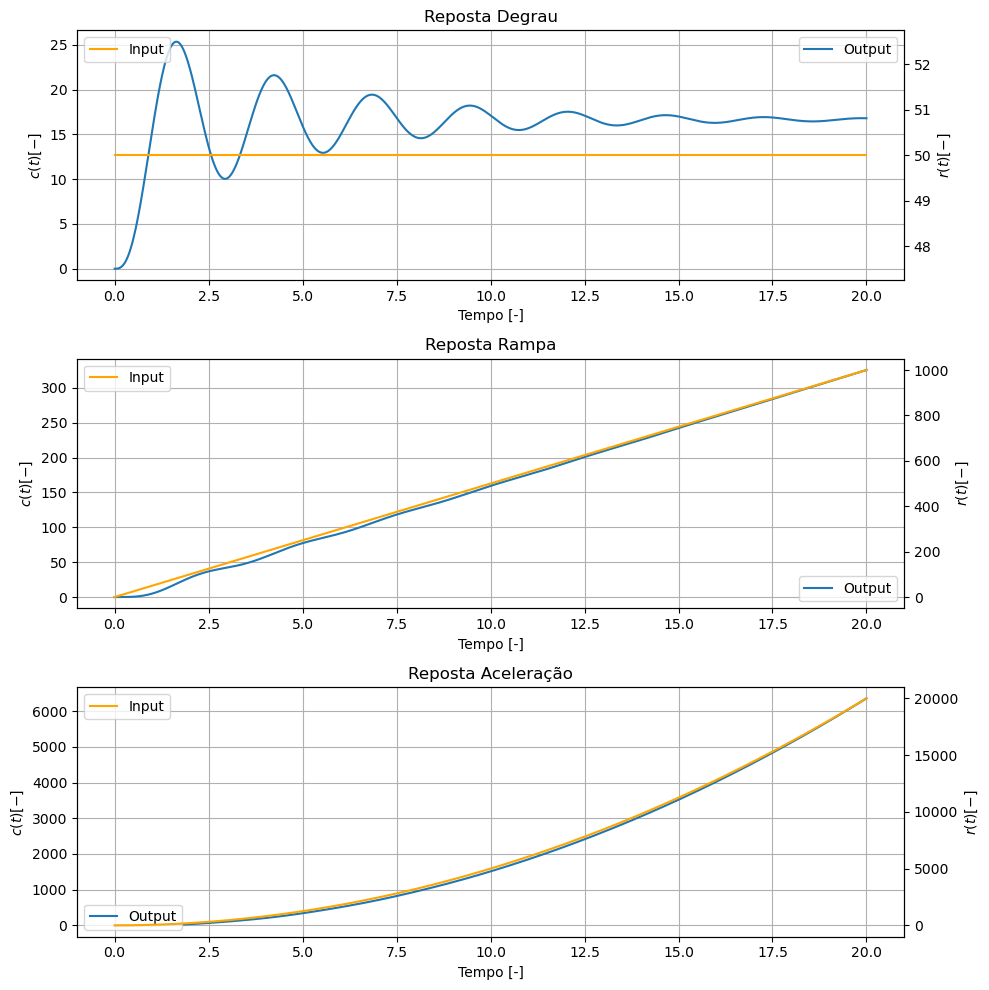

In [4]:
fig, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize = (10, 10), dpi = 100)

# Reposta degrau
ax1.plot(step_res.time, step_res.outputs, label = 'Output')
ax11 = ax1.twinx()
ax11.plot(step_res.time, step_res.inputs, color = 'orange', label = 'Input')
ax1.set(title = 'Reposta Degrau', xlabel = 'Tempo [-]', ylabel = '$c(t) [-]$')
ax11.set(ylabel = '$r(t) [-]$')
ax1.grid()
ax1.legend(loc = 1)
ax11.legend(loc = 2)

# Resposta rampa
ax2.plot(ramp_res.time, ramp_res.outputs, label = 'Output')
ax22 = ax2.twinx()
ax22.plot(ramp_res.time, ramp_res.inputs, color = 'orange', label = 'Input')
ax2.set(title = 'Reposta Rampa', xlabel = 'Tempo [-]', ylabel = '$c(t) [-]$')
ax22.set(ylabel = '$r(t) [-]$')
ax2.grid()
ax2.legend(loc = 4)
ax22.legend(loc = 2)

# Resposta aceleração
ax3.plot(ac_res.time, ac_res.outputs, label = 'Output')
ax33 = ax3.twinx()
ax33.plot(ac_res.time, ac_res.inputs, color = 'orange', label = 'Input')
ax3.set(title = 'Reposta Aceleração', xlabel = 'Tempo [-]', ylabel = '$c(t) [-]$')
ax33.set(ylabel = '$r(t) [-]$')
ax3.grid()
ax3.legend(loc = 3)
ax33.legend(loc = 2)

fig.tight_layout()

In [5]:
fig.savefig('PT4-fig1.jpg')

Gráficos de c(t) e e(t)

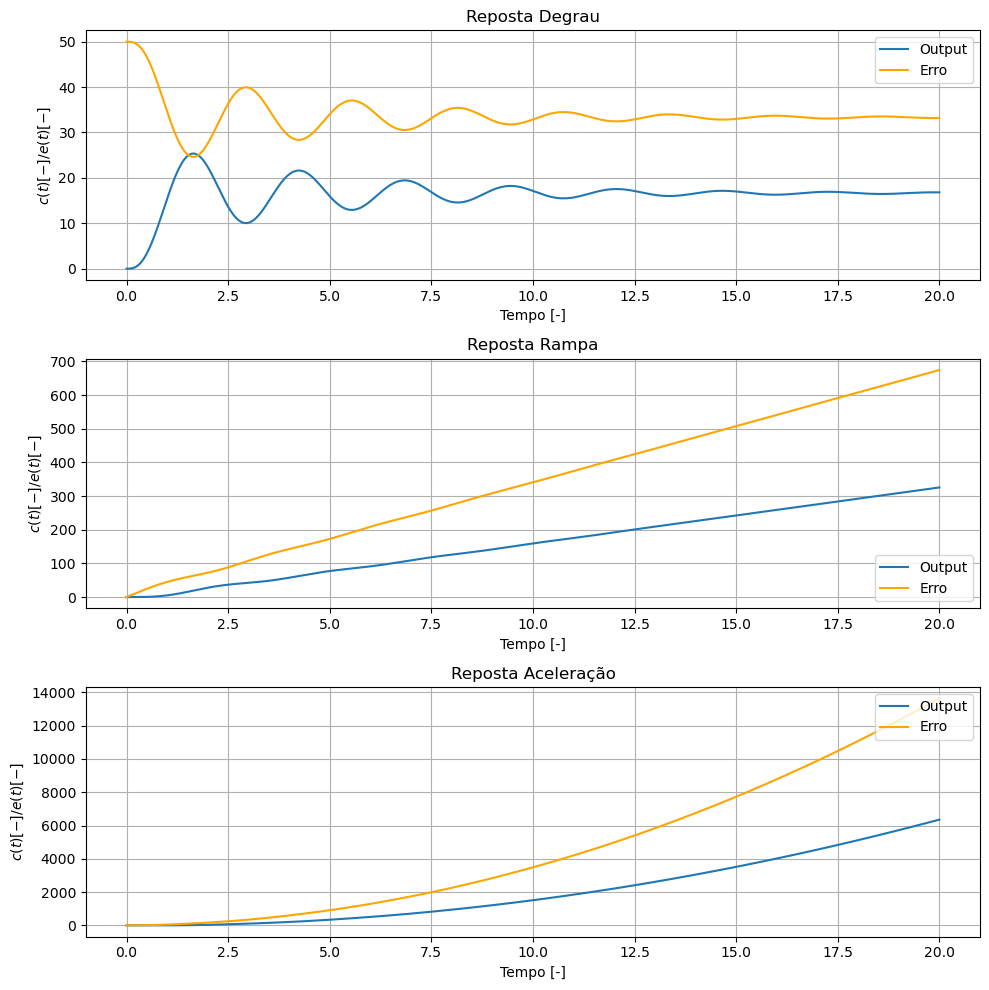

In [6]:
fig2, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize = (10, 10), dpi = 100)

# Reposta degrau
ax1.plot(step_res.time, step_res.outputs, label = 'Output')
ax1.plot(step_res.time,  step_res.inputs - step_res.outputs, color = 'orange', label = 'Erro')
ax1.set(title = 'Reposta Degrau', xlabel = 'Tempo [-]', ylabel = '$c(t) [-]/e(t) [-]$')
ax1.grid()
ax1.legend(loc = 1)

# Resposta rampa
ax2.plot(ramp_res.time, ramp_res.outputs, label = 'Output')
ax2.plot(ramp_res.time, ramp_res.inputs - ramp_res.outputs, color = 'orange', label = 'Erro')
ax2.set(title = 'Reposta Rampa', xlabel = 'Tempo [-]', ylabel = '$c(t) [-]/e(t) [-]$')
ax2.grid()
ax2.legend(loc = 4)

# Resposta aceleração
ax3.plot(ac_res.time, ac_res.outputs, label = 'Output')
ax3.plot(ac_res.time, ac_res.inputs - ac_res.outputs, color = 'orange', label = 'Erro')
ax3.set(title = 'Reposta Aceleração', xlabel = 'Tempo [-]', ylabel = '$c(t) [-]/e(t) [-]$')
ax3.grid()
ax3.legend(loc = 1)

fig2.tight_layout()

In [7]:
fig2.savefig('PT4-fig2.jpg')